In [1]:
%matplotlib notebook

### Importing the Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Importing the data

In [3]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)

### Defining Inputs and Outputs

In [4]:
X=np.array(df.Hours).reshape(-1,1)
y=np.array(df.Scores).reshape(-1,1)

### Scatter Plotting

<IPython.core.display.Javascript object>


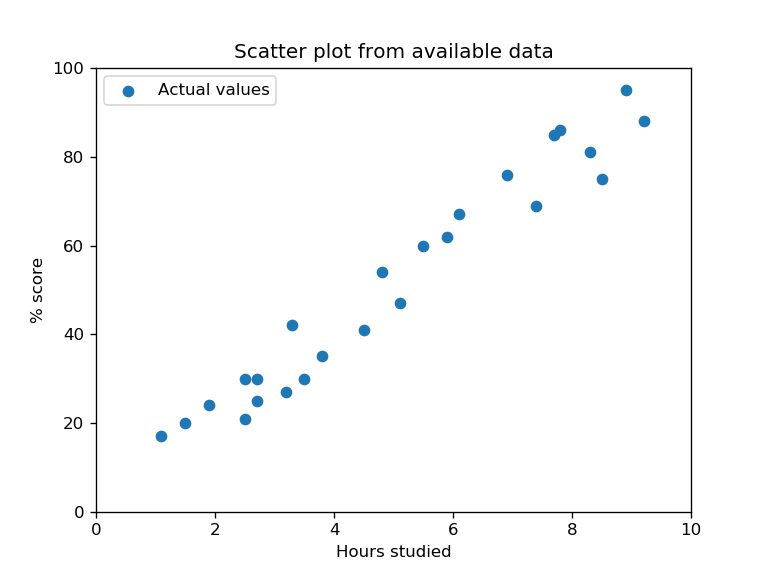

In [5]:
plt.figure()
plt.scatter(X,y,label='Actual values')
plt.title("Scatter plot from available data")
plt.xlabel("Hours studied")
plt.ylabel("% score")
plt.legend()

plt.show()
ax=plt.gca()
ax.axis([0,10,0,100])
plt.show()

### Importing required modules for LinearRegression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Obtaining Training and Testing data

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Linear Plot along with Actual Values 

<IPython.core.display.Javascript object>


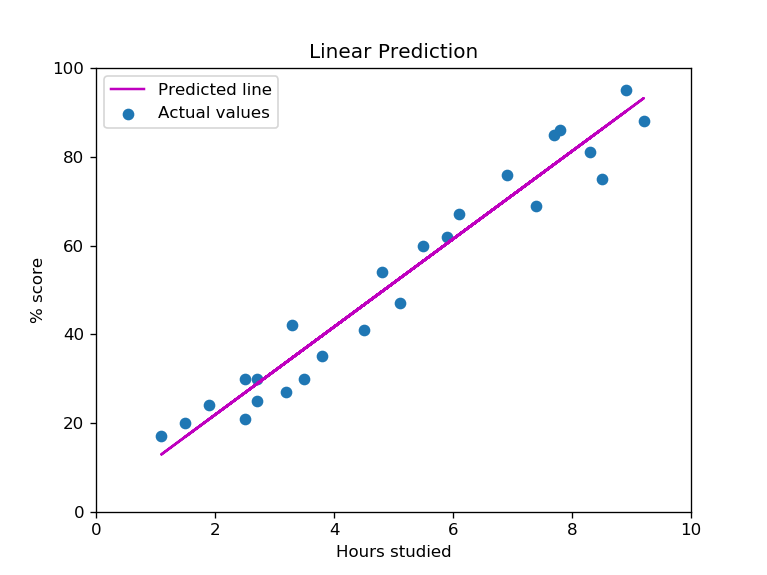

In [8]:
plt.figure()
line=linreg.coef_*X+linreg.intercept_
plt.scatter(X,y,label='Actual values')
plt.plot(X,line,color='m',label='Predicted line')
plt.xlabel("Hours studied")
plt.ylabel("% score")
plt.title('Linear Prediction')
plt.legend()
ax=plt.gca()
ax.axis([0,10,0,100])
plt.show()

### Comparision of test values with actual values

In [9]:
y_pred=linreg.predict(x_test)
verdf=pd.DataFrame(data=(y_test),columns=['Actual val'])
verdf['Predicted val']=y_pred
verdf['Abs Diff']=abs(y_test-y_pred)
verdf

,Actual val,Predicted val,Abs Diff
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


### Solution

In [10]:
Hours=9.25
ans=linreg.predict([[Hours]])
print("No of Hours = {} and obtained score {}".format(Hours,ans[0][0]))

No of Hours = 9.25 and obtained score 93.69173248737538


## Predicted Obtainable Score for 9.25 Hrs Study is 93.69%

### Verification and Validation

In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
